## Парная регрессия

Импортируем необходимые модули.

In [32]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

Загрузим данные.

In [2]:
df=pd.DataFrame([[4.0, 5.2, 3.8, 2.9, 4.6, 4.5, 3.7, 5.0],
             [1.0, 0.9, 1.1, 1.2, 0.95, 0.9, 1.0, 0.95],
             [8.0, 9.0, 6.0, 5.0, 7.0, 6.0, 6.0, 10.0],
             [24.0, 26.0, 20.0, 18.0, 20.0, 30.0, 27.0, 28.0]],
            columns=list(range(1,9)), index=['Объем продаж', 'Розн. цена',
                                            'Расходы на рекламу', 'Кол. работы']).transpose()

In [5]:
df

,Объем продаж,Розн. цена,Расходы на рекламу,Кол. работы
1,4.0,1.00,8.0,24.0
2,5.2,0.90,9.0,26.0
3,3.8,1.10,6.0,20.0
4,2.9,1.20,5.0,18.0
5,4.6,0.95,7.0,20.0
6,4.5,0.90,6.0,30.0
7,3.7,1.00,6.0,27.0
8,5.0,0.95,10.0,28.0


## Исследование зависимости объема продаж от розничной цены

Стандартизируем данные

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standartized=scaler.fit_transform(df)

In [74]:
model=sm.OLS(standartized[:,0], standartized[:,1]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     27.08
Date:                Sun, 27 May 2018   Prob (F-statistic):            0.00125
Time:                        18:05:57   Log-Likelihood:                -5.0199
No. Observations:                   8   AIC:                             12.04
Df Residuals:                       7   BIC:                             12.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8914      0.171     -5.204      0.001      -1.296      -0.486
==============================================================================
Omnibus:                        0.792   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.556
Skew:                          -0.165   Prob(JB):                        0.757
Kurtosis:                       1.751   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Выше преведена таблица, обобщающая результаты построенной регрессионной модели. Коэффициент детерминации (**R-squared**) имеет достаточно высокое значение, **0.795**, данный результат статистически значим, **p-value << 0.05** (**Prob (F-statistic)**). Результаты регрессионного анализа признаются значимыми.

Ниже в таблице приведен стандартизированный коэффициент наклона регрессионной прямой, **-0.8914** (**x1, coef**). А также p-value для него (**P>[t]**). **p-value << 0.05**, полученный наклон статистически значимый.

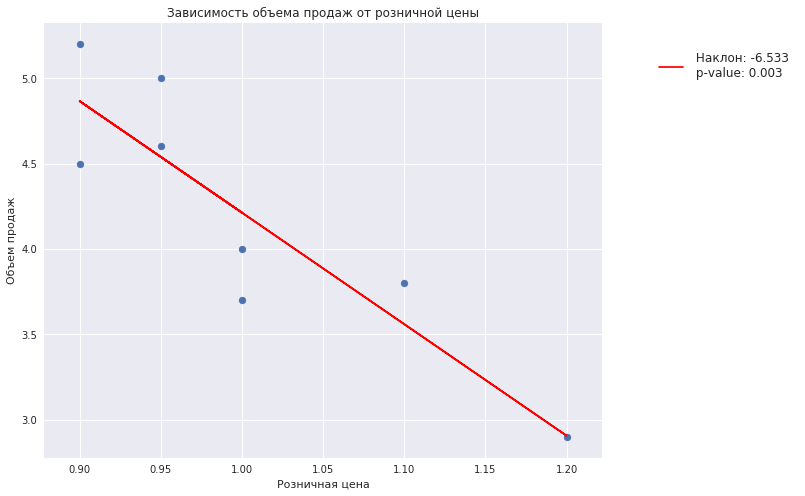

In [98]:
slope, intercept, rval, pval, stderr=st.linregress(df.values[:,1], df.values[:,0])

sns.set()
fig=plt.figure(figsize=[10, 8])
ax=plt.subplot(1, 1, 1)
plt.scatter(df.values[:,1], df.values[:,0])
plt.plot(df.values[:,1], slope*df.values[:,1]+intercept, c='r',
        label=' Наклон: %s \n p-value: %s'%(np.round(slope, 3), np.round(pval, decimals=3)))
plt.title('Зависимость объема продаж от розничной цены')
plt.xlabel('Розничная цена')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2, fontsize=12)
_=plt.ylabel('Объем продаж')

Наклон регрессионной прямой отрицательный, зависимость между розничной ценой и объемом продаж обратная: чем меньше цена на товар, тем больше его покупают.

Слева от графика приведен нестандартизированный наклон и p-value для него.

## Зависимость объема продаж от расходов на рекламу

In [36]:
model=sm.OLS(standartized[:,0], standartized[:,2]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     12.94
Date:                Sun, 27 May 2018   Prob (F-statistic):            0.00877
Time:                        16:10:58   Log-Likelihood:                -7.1644
No. Observations:                   8   AIC:                             16.33
Df Residuals:                       7   BIC:                             16.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8056      0.224      3.597      0.009       0.276       1.335
==============================================================================
Omnibus:                        0.738   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.545
Skew:                           0.176   Prob(JB):                        0.761
Kurtosis:                       1.770   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент детерминации (**R-squared**) равен **0.649**, а также статистически значим **p-value << 0.05** (**Prob (F-statistic)**). Результаты регрессионного анализа признаются значимыми.

Коэффициент детерминации меньше, чем в предыдущем случае, значит, что объем продаж объясняется затратами на рекламу не так хорошо, как розничной ценой товаров.

Ниже в таблице приведен стандартизированный коэффициент наклона регрессионной прямой, **0.8056** (**x1, coef**). А также p-value для него (**P>[t]**). 

**p-value << 0.05**, полученный наклон статистически значимый.

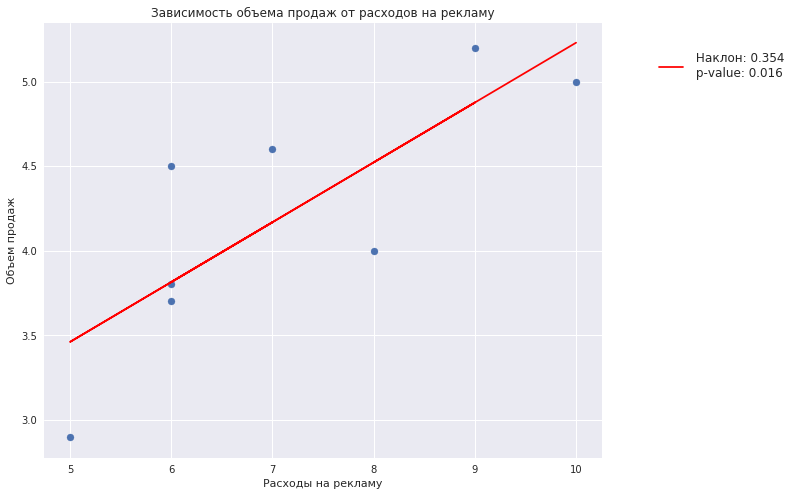

In [97]:
slope, intercept, rval, pval, stderr=st.linregress(df.values[:,2], df.values[:,0])

sns.set()
fig=plt.figure(figsize=[10, 8])
ax=plt.subplot(1, 1, 1)
plt.scatter(df.values[:,2], df.values[:,0])
plt.plot(df.values[:,2], slope*df.values[:,2]+intercept, c='r',
        label=' Наклон: %s \n p-value: %s'%(np.round(slope, 3), np.round(pval, decimals=3)))
plt.title('Зависимость объема продаж от расходов на рекламу')
plt.xlabel('Расходы на рекламу')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2, fontsize=12)
_=plt.ylabel('Объем продаж')

Наклон регрессионной прямой положительный, зависимость прямая: с увеличением расходов на рекламу увеличивается и объем проданного товара.

Слева от графика приведен нестандартизированный наклон и p-value для него.

## Зависимость объема продаж от количества работников, занимающихся сбытом продукции

In [41]:
model=sm.OLS(standartized[:,0], standartized[:,3]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     3.445
Date:                Sun, 27 May 2018   Prob (F-statistic):              0.106
Time:                        16:13:33   Log-Likelihood:                -9.7507
No. Observations:                   8   AIC:                             21.50
Df Residuals:                       7   BIC:                             21.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5743      0.309      1.856      0.106      -0.157       1.306
==============================================================================
Omnibus:                        1.172   Durbin-Watson:                   2.696
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.628
Skew:                           0.126   Prob(JB):                        0.730
Kurtosis:                       1.651   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Для данной модели имеем самое низкое значение коэффициента детерминации (**R-sqared**), 0.330. Также данный результат статистически не значим при уровне значимости 0.05.

Ниже в таблице приведен стандартизированный коэффициент наклона регрессионной прямой, **0.5743** (**x1, coef**). А также p-value для него (**P>[t]**). **p-value > 0.05**.

Мы не можем признать результаты регрессионого анализа значимыми.

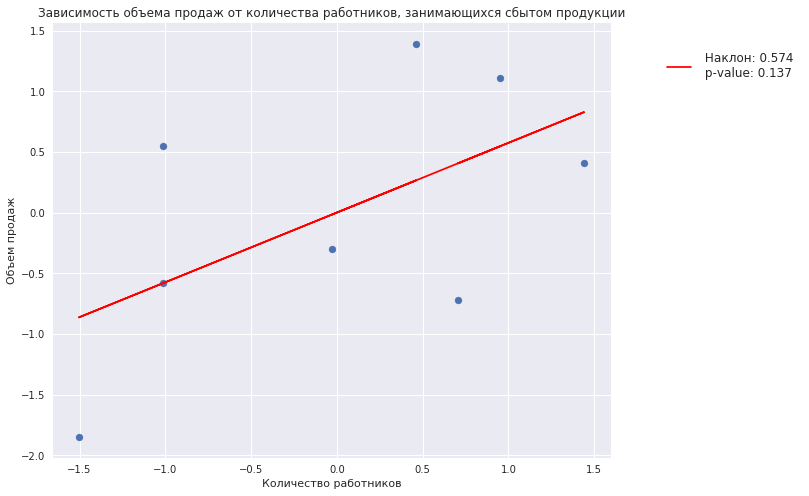

In [101]:
slope, intercept, rval, pval, stderr=st.linregress(standartized[:,3], standartized[:,0])

sns.set()
fig=plt.figure(figsize=[10, 8])
ax=plt.subplot(1, 1, 1)
plt.scatter(standartized[:,3], standartized[:,0])
plt.plot(standartized[:,3], slope*standartized[:,3]+intercept, c='r',
        label=' Наклон: %s \n p-value: %s'%(np.round(slope, 3), np.round(pval, decimals=3)))
plt.title('Зависимость объема продаж от количества работников, занимающихся сбытом продукции')
plt.xlabel('Количество работников')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2, fontsize=12)
_=plt.ylabel('Объем продаж')

Хотя зависимость положительная, мы не можем утверждать, что с увеличением числа работников, занятых распространением продукции, растет объем продаж, поскольку данный результат статистически не значим на уровне значимости 0.05. Мы не можем отвергнуть нулевую гипотезу о равенстве коэффициента наклона нулю.